<a href="https://colab.research.google.com/github/sahanas0/LEGO_ErrorDetection/blob/main/LEGO_ErrorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Clean any old data
#shutil.rmtree('dataset', ignore_errors=True)
#shutil.rmtree('dataset_split', ignore_errors=True)

from google.colab import files
import zipfile
import os
import shutil

uploaded = files.upload()  # Upload your dataset.zip

# Make sure to use the correct filename from your upload
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')  # Extract into 'dataset' folder

print("✅ Dataset extracted.")



Saving dataset.zip to dataset.zip
✅ Dataset extracted.


In [8]:
import os
print(os.listdir())  # List contents of the current working directory

['.config', 'dataset', 'dataset.zip', 'sample_data']


In [3]:
import shutil
shutil.rmtree('dataset', ignore_errors=True)
shutil.rmtree('dataset_split', ignore_errors=True)


In [11]:
import os
import zipfile

# List current directory contents
print(os.listdir())  # Check available files

# ✅ Correct filename and extraction logic
dataset_zip = 'dataset (2).zip'

# Check if the zip file exists before extracting
if os.path.exists(dataset_zip):
    with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    print("✅ New dataset extracted.")
else:
    print(f"❌ File '{dataset_zip}' not found in current directory.")


['.config', 'dataset', 'dataset.zip', 'sample_data']
❌ File 'dataset (2).zip' not found in current directory.


In [12]:
import os

for root, dirs, files in os.walk('dataset'):
    print(f"{root} has {len(files)} files")


dataset has 0 files
dataset/dataset has 0 files
dataset/dataset/bad has 143 files
dataset/dataset/good has 161 files


In [16]:
import os
import shutil
import random  # ✅ FIXED: Import random for shuffling

# STEP 2: Organize the dataset into train/test split using shutil
original_dir = 'dataset/dataset'
output_dir = 'dataset_split'
categories = ['bad', 'good']
train_ratio = 0.8

# Make new split folders
for split in ['train', 'test']:
    for category in categories:
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

# Copy images into train/test folders
for category in categories:
    image_list = os.listdir(os.path.join(original_dir, category))
    random.shuffle(image_list)
    split_index = int(len(image_list) * train_ratio)
    train_images = image_list[:split_index]
    test_images = image_list[split_index:]

    for img in train_images:
        shutil.copyfile(os.path.join(original_dir, category, img),
                        os.path.join(output_dir, 'train', category, img))
    for img in test_images:
        shutil.copyfile(os.path.join(original_dir, category, img),
                        os.path.join(output_dir, 'test', category, img))

print("✅ Data split into train/test folders.")

# Optional: Check the file distribution
for root, dirs, files in os.walk("dataset_split"):
    print(f"{root} has {len(files)} files")


✅ Data split into train/test folders.
dataset_split has 0 files
dataset_split/train has 0 files
dataset_split/train/bad has 114 files
dataset_split/train/good has 128 files
dataset_split/test has 0 files
dataset_split/test/bad has 29 files
dataset_split/test/good has 33 files


In [17]:
from collections import Counter

train_images = []
test_images = []

for category in categories:
    train_path = os.path.join(output_dir, 'train', category)
    test_path = os.path.join(output_dir, 'test', category)
    train_images += [os.path.join('train', category, img) for img in os.listdir(train_path)]
    test_images += [os.path.join('test', category, img) for img in os.listdir(test_path)]

duplicates = set(train_images) & set(test_images)
print(f"Number of duplicates between train and test: {len(duplicates)}")


Number of duplicates between train and test: 0


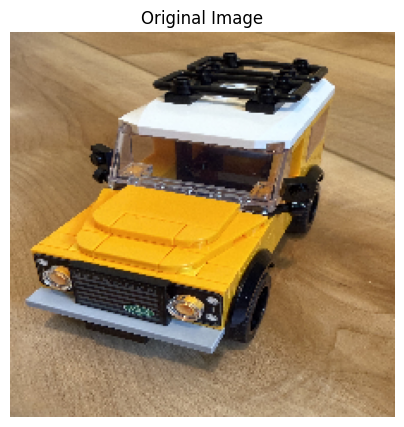

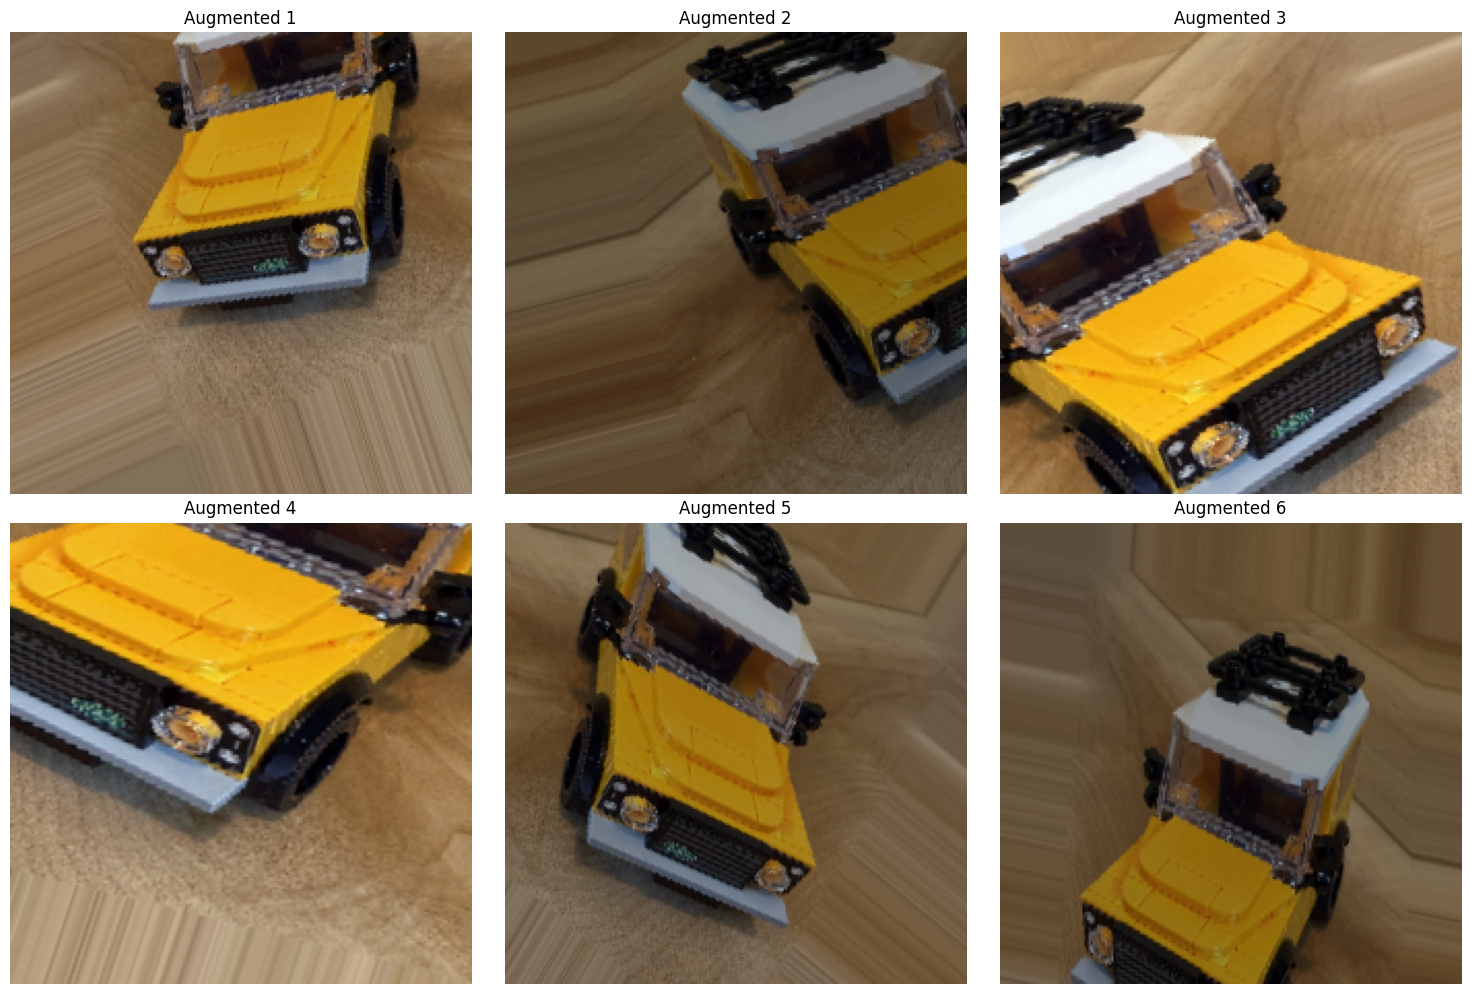

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Set paths
IMG_SIZE = (224, 224)
DATA_ROOT = "dataset_split"
category = "good"  # Choose 'good' or 'bad' class
subset = "train"

# Load a sample image
sample_dir = os.path.join(DATA_ROOT, subset, category)
sample_image_name = os.listdir(sample_dir)[0]  # Pick the first image
sample_image_path = os.path.join(sample_dir, sample_image_name)

# Load and display original image
original_img = load_img(sample_image_path, target_size=IMG_SIZE)
plt.figure(figsize=(5,5))
plt.imshow(original_img)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Convert to array for augmentation
x = img_to_array(original_img)
x = np.expand_dims(x, axis=0)

# Define your augmentation generator
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

# Generate and display augmented images
aug_iter = datagen.flow(x, batch_size=1)

plt.figure(figsize=(15,10))
for i in range(6):  # Show 6 augmentations
    plt.subplot(2, 3, i+1)
    batch = next(aug_iter)
    img = batch[0]
    # Convert back to uint8 for visualization
    img = ((img + 1) * 127.5).astype(np.uint8)  # Reverse MobileNetV2 preprocessing
    plt.imshow(img)
    plt.title(f"Augmented {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Found 195 images belonging to 2 classes.
Found 47 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6094 - loss: 2.9791

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.6106 - loss: 2.9699 - val_accuracy: 0.5957 - val_loss: 2.5853
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.7739 - loss: 2.3207 - val_accuracy: 0.5745 - val_loss: 2.2820
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7471 - loss: 2.0765 - val_accuracy: 0.6383 - val_loss: 2.0685
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.8131 - loss: 1.7764 - val_accuracy: 0.6383 - val_loss: 1.8778
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.8513 - loss: 1.4989 - val_accuracy: 0.6596 - val_loss: 1.7901
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.8921 - loss: 1.3525 - val_accuracy: 0.6596 - val_loss: 1.7816
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8856 - loss: 1.2291 - val_accuracy: 0.6383 - val_loss: 1.7185
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9019 - loss: 1.1950 - val_accuracy: 0.6809 - val_loss: 1.5827
Epo

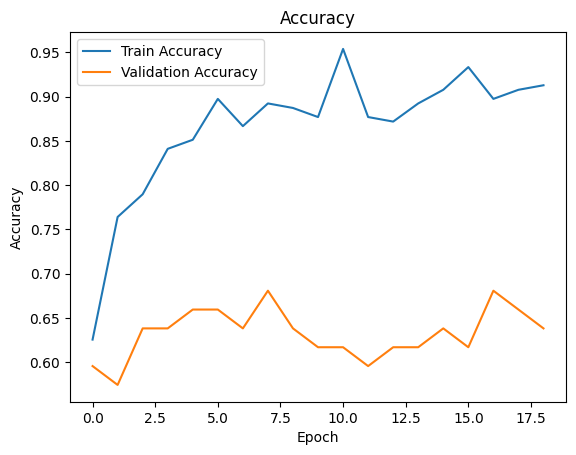

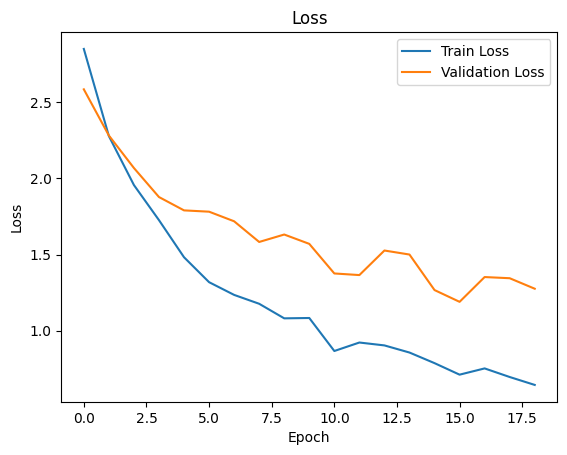

3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step

Classification Report:
              precision    recall  f1-score   support

         bad       0.60      0.55      0.57        22
        good       0.63      0.68      0.65        25

    accuracy                           0.62        47
   macro avg       0.61      0.61      0.61        47
weighted avg       0.62      0.62      0.62        47



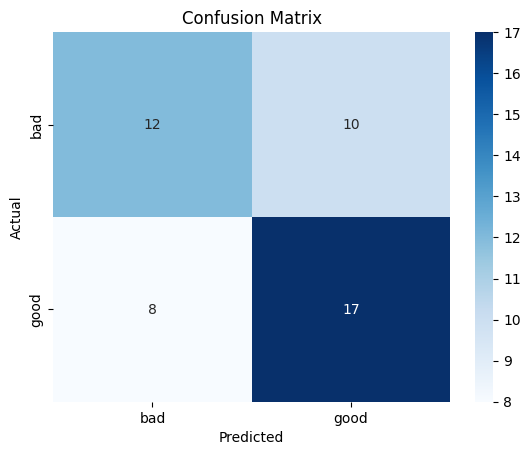

Accuracy: 0.6170
Precision: 0.6296
Recall: 0.6800
F1 Score: 0.6538
✅ Model and metrics complete.


In [18]:
# STEP 3: Build, train, evaluate model with metrics
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import os

IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 20  # Increased from 5 to 20
DATA_ROOT = "dataset_split"

# ✅ ImageDataGenerator with Augmentation for Training
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    os.path.join(DATA_ROOT, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training",
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    os.path.join(DATA_ROOT, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation",
    shuffle=False
)

# ✅ Build model with L2 regularization
base_model = MobileNetV2(include_top=False, weights="imagenet", input_shape=(*IMG_SIZE, 3))
base_model.trainable = False

inputs = Input(shape=(*IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # Added L2 regularization
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# ✅ Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Train with EarlyStopping
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=[early_stop]
)

# ✅ Plot accuracy and loss
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(), plt.title('Accuracy'), plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(), plt.title('Loss'), plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

# ✅ Evaluation metrics
val_preds = model.predict(val_gen)
y_pred = [int(p > 0.5) for p in val_preds.flatten()]
y_true = val_gen.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['bad', 'good']))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision: {precision_score(y_true, y_pred):.4f}")
print(f"Recall: {recall_score(y_true, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")

# ✅ Save model
model.save("lego_error_model.h5")
print("✅ Model and metrics complete.")
